In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Paths to the files
carbonFilePath = r'C:\Users\aclark48\Desktop\DataScience1\Data files\State energy-related carbon dioxide emissions by year.xlsx'
cancerFilePath = r'C:\Users\aclark48\Desktop\DataScience1\Data files\Lung cancer by state.xlsx'
populationFilePath = r'C:\Users\aclark48\Desktop\DataScience1\Data files\Population numbers.xlsx'

In [3]:
#Sets data frames to the data
unwrangledCarbonData = pd.read_excel(carbonFilePath)
cancerData = pd.read_excel(cancerFilePath)
populationData = pd.read_excel(populationFilePath)

In [4]:
#wrangling
carbonKeep = ['State', 2021]
carbonData = unwrangledCarbonData[carbonKeep]

In [5]:
#Sets up main data frame
columns = ['State', 'Carbon output', 'Cancer Cases per 1 million people']
StateDF = [carbonData['State']]

In [6]:
CarbonOutput = carbonData[2021]
merged_df = pd.merge(cancerData, populationData, on='State')
merged_df['Cancer Cases per 1 million people'] = ((merged_df['Lung & bronchus cancer']) / merged_df[2021]) *1000000
ckeep = ["State", "Cancer Cases per 1 million people"]
cancerCases = merged_df[ckeep]
#print(cancerCases)

In [18]:
finalDF = pd.merge(cancerCases, carbonData, on='State')
finalDF.rename(columns={2021: 'Carbon Output'}, inplace=True)
print(finalDF.corr())

                                   Cancer Cases per 1 million people  \
Cancer Cases per 1 million people                           1.000000   
Carbon Output                                              -0.116002   

                                   Carbon Output  
Cancer Cases per 1 million people      -0.116002  
Carbon Output                           1.000000  


In [8]:
print(finalDF)

                   State  Cancer Cases per 1 million people  Carbon Output
0                Alabama                         895.076800     108.392103
1                 Alaska                         503.962233      38.872526
2                Arizona                         626.301037      83.024267
3               Arkansas                         980.805925      62.024941
4             California                         453.721076     324.039053
5               Colorado                         442.242067      85.381781
6            Connecticut                         758.965103      36.573257
7               Delaware                         905.646557      12.966634
8   District of Columbia                         538.284756       2.520856
9                Florida                         846.158219     226.324207
10               Georgia                         672.041204     124.119174
11                Hawaii                         642.640659      17.340248
12                 Idaho 

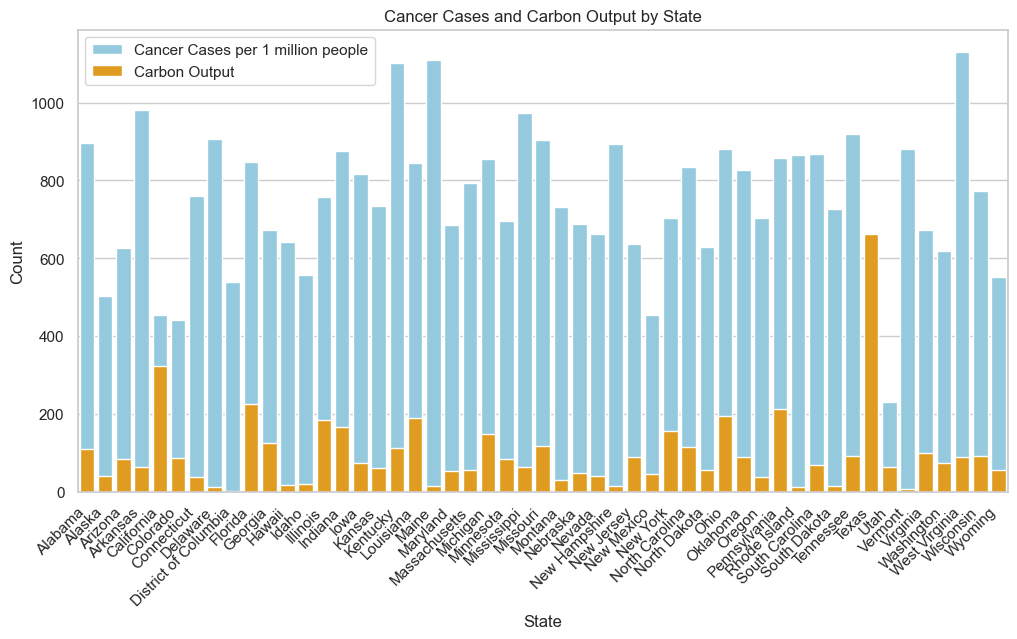

In [9]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Cancer Cases per 1 million people', data=finalDF, color='skyblue', label='Cancer Cases per 1 million people')
sns.barplot(x='State', y='Carbon Output', data=finalDF, color='orange', label='Carbon Output')

# Customize the plot
plt.title('Cancer Cases and Carbon Output by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

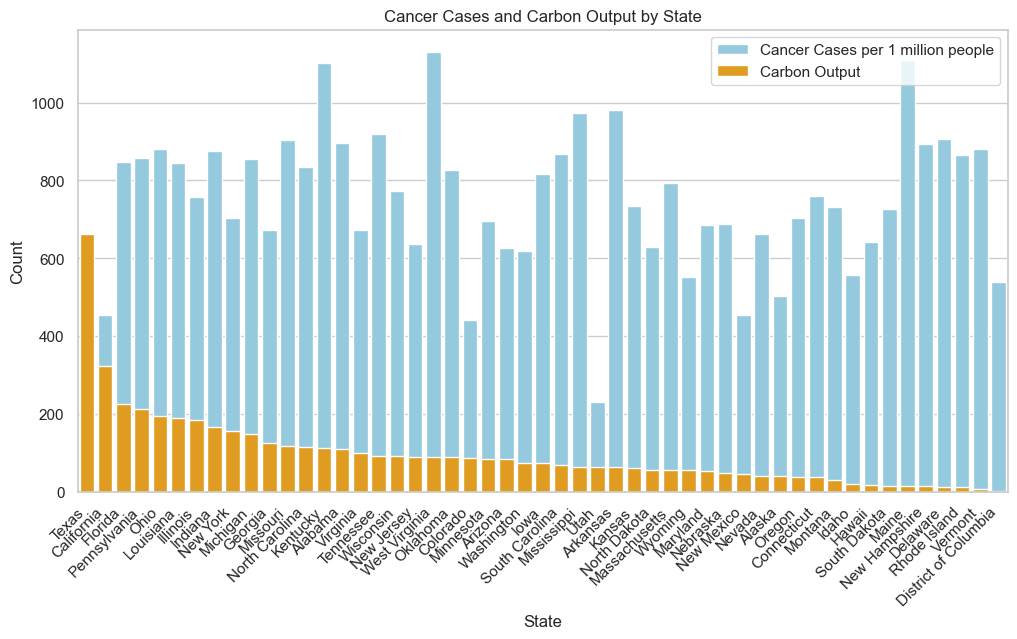

In [10]:
finalDF = finalDF.sort_values(by='Carbon Output', ascending=False)
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Cancer Cases per 1 million people', data=finalDF, color='skyblue', label='Cancer Cases per 1 million people')
sns.barplot(x='State', y='Carbon Output', data=finalDF, color='orange', label='Carbon Output')

# Customize the plot
plt.title('Cancer Cases and Carbon Output by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Carbon Output', ylabel='Cancer Cases per 1 million people'>

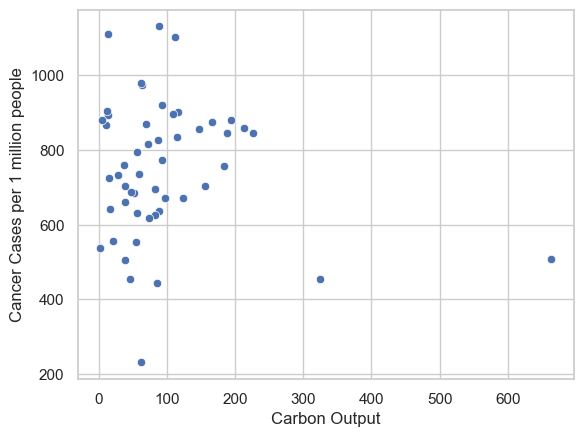

In [11]:
sns.scatterplot(data=finalDF, x="Carbon Output", y="Cancer Cases per 1 million people")

In [12]:
# data = [[df],[]]
# np.corrcoef(finalDF, rowvar=False)